## Dump all urls from scraped jsons into aria2c compatible input file

In [5]:
import json
import os
SCRAPED_DIR = "scraped/instagram"

all_urls = []
all_images_urls = []
for file_path in os.listdir(SCRAPED_DIR):
    if not file_path.endswith('.json'):
        continue
    try:
        with open(f"{SCRAPED_DIR}/{file_path}", "r") as file:
            json_data = json.load(file)
        
        for data in json_data['data']['user'].get('edge_felix_video_timeline', {}).get('edges', []):
            display_url = data['node']['display_url']
            video_url = data['node']['video_url']
            all_images_urls.append(display_url)
            all_urls.append(video_url)

        for data in json_data['data']['user'].get('edge_owner_to_timeline_media', {}).get('edges', []):
            display_url = data['node']['display_url']
            all_images_urls.append(display_url)
            for side_post in data['node'].get('edge_sidecar_to_children', {}).get('edges', []):
                all_images_urls.append(side_post['node']['display_url'])

        for data in json_data['data']['user'].get('edge_related_profiles', {}).get('edges', []):
            related_user_profile_pic = data['node']['profile_pic_url']
            all_images_urls.append(related_user_profile_pic)
    except Exception as e:
        print(f"Failed to extract urls from {file_path}: {e}")

all_urls.extend(all_images_urls)
all_urls = set([url for url in all_urls if url is not None])
all_images_urls = set([url for url in all_images_urls if url is not None])
print(len(all_urls), len(all_images_urls))
# all_urls

669288 623321


In [6]:
all_urls = list(sorted(all_urls))
all_images_urls = list(sorted(all_images_urls))

In [7]:
with open("all_urls.txt", "w") as all_urls_file:
    for url in all_urls:
        all_urls_file.write(url + "\n")

with open("all_images_urls.txt", "w") as all_images_urls_file:
    for image_url in all_images_urls:
        all_images_urls_file.write(image_url + "\n")


In [10]:
with open("all_images_urls.txt", "r") as all_images_urls_file:
    all_images_urls = [line.strip() for line in all_images_urls_file]


In [11]:
file_name = 1
url_to_filename = {}
for url in all_images_urls:
    ext = ".jpg"
    if ".mp4?" in url:
        ext = ".mp4"
    url_to_filename[url] = f"{file_name}{ext}"
    file_name += 1
len(url_to_filename.keys())

623321

In [13]:
with open("url_to_filename.json", "w") as json_file:
    json.dump(url_to_filename, json_file)

In [1]:
import json

# Load the url_to_filename mapping from the JSON file
with open("url_to_filename.json", "r") as json_file:
    url_to_filename = json.load(json_file)


In [14]:
with open("aria2c_input_file.txt", "w") as f:
    for url, file_name in url_to_filename.items():
        f.write(url + "\n")
        f.write(f" out={file_name}\n")


## aria2c Download command:
1. ulimit -n 65536 # To increase no. of concurrent file operations
2. aria2c -i aria2c_input_file.txt --dir=images --continue=true --max-connection-per-server=16 --split=1 --max-concurrent-downloads=100 --max-overall-download-limit=0 --max-download-limit=0 --console-log-level=warn --summary-interval=0 --disk-cache=128M --allow-overwrite=true

## Loading images of a user

In [37]:
import json

SCRAPED_DIR = "scraped/instagram"
username = "emitaz"
with open(f"{SCRAPED_DIR}/{username}.json") as f:
    username_data = json.load(f)
# username_data
all_images_urls = []
all_urls = []
for data in username_data['data']['user'].get('edge_felix_video_timeline', {}).get('edges', []):
    display_url = data['node']['display_url']
    video_url = data['node']['video_url']
    all_images_urls.append(display_url)
    all_urls.append(video_url)

for data in username_data['data']['user'].get('edge_owner_to_timeline_media', {}).get('edges', []):
    display_url = data['node']['display_url']
    all_images_urls.append(display_url)
    for side_post in data['node'].get('edge_sidecar_to_children', {}).get('edges', []):
        all_images_urls.append(side_post['node']['display_url'])

# for data in username_data['data']['user'].get('edge_related_profiles', {}).get('edges', []):
#     related_user_profile_pic = data['node']['profile_pic_url']
#     all_images_urls.append(related_user_profile_pic)
all_urls.extend(all_images_urls)
print(len(all_urls), len(all_images_urls))

60 59


In [29]:
with open("url_to_filename.json") as f:
    url_to_filename = json.load(f)
user_filenames = [f"images2/{url_to_filename[url]}" for url in all_images_urls]

In [39]:
from PIL import Image
images = [Image.open(f) for f in user_filenames]

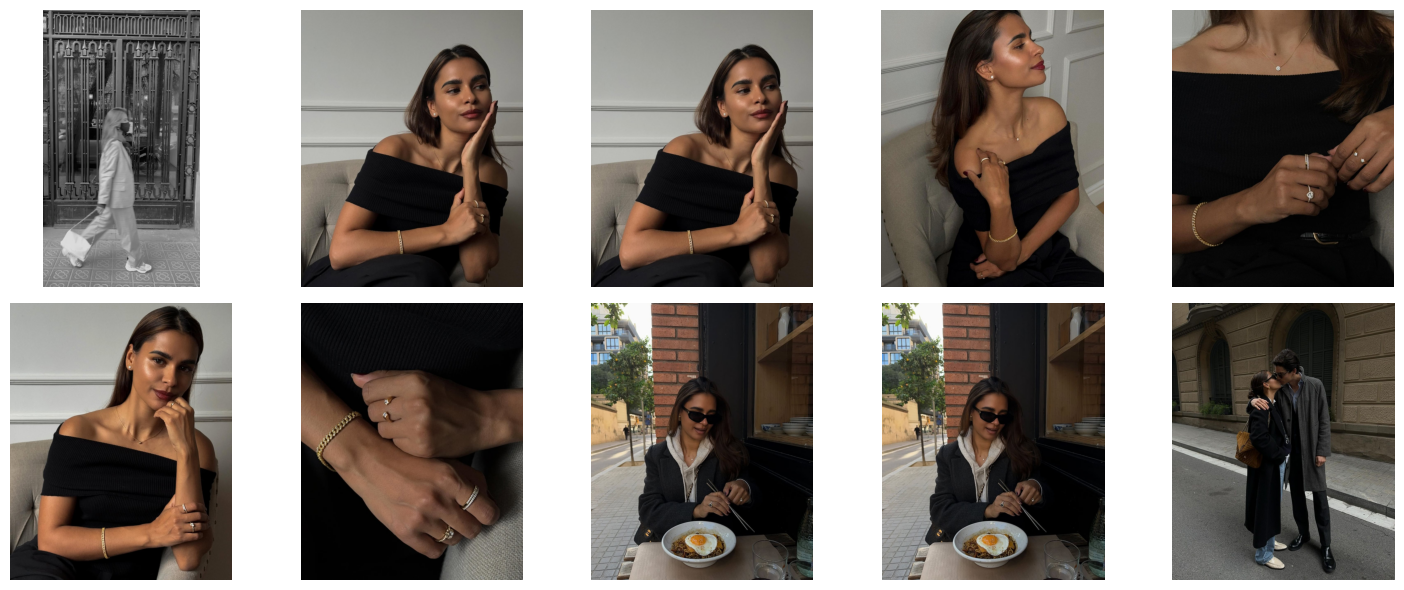

In [42]:
import matplotlib.pyplot as plt

# Select the first 10 images from the images list
images_to_plot = images[:10]

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each image in the grid
for ax, img in zip(axes, images_to_plot):
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()
